In [1]:
import pickle

from utils import *
from multi_threading import read_all_images, parallel_sum
from plotting import plot_SUM_or_RMS

##### Keep going

In [3]:
@timer_decorator(configs)
def get_sum_array_dense(tiff_path:str, array_configs:configDict) -> np.ndarray:
    debugging = array_configs['debugging']
    pickle_usage = array_configs['pickle_usage']

    image_arrays_arr = read_all_images(tiff_path, array_configs)
    if debugging==True and pickle_usage==False:
        print('NOT USING PICKLE')
    
    if os.path.exists(f'{tiff_path}\\sum_image_arrays.pkl') and pickle_usage==True:
        with open(f'{tiff_path}\\sum_image_arrays.pkl', 'rb') as f:
            sum_array = pickle.load(f)
        print('Loaded sum_image_arrays.pkl')

    else:
        sum_array_arr = parallel_sum(image_arrays_arr)
        sum_array = sum_array_arr

        if pickle_usage==True:
            with open(f'{tiff_path}\\sum_image_arrays.pkl', 'wb') as f:
                pickle.dump(sum_array, f)

    return sum_array

#### Testing

In [8]:
tiff_main_folder = 'C:\\LABDATA_office\\3.12 qCMOS'


# tiff_path = tiff_main_folder + '\\full_1s_6000_shot'
# tiff_path = tiff_main_folder + '\\full_frame_quick'
# tiff_path = tiff_main_folder + '\\full_frame'
# tiff_path = tiff_main_folder + '\\full_200ms_6247shots'
# tiff_path = tiff_main_folder + '\\full_5s_2000shots'
tiff_path = tiff_main_folder + '\\full_5s_6000shots'
# tiff_path = tiff_main_folder + '\\full_200ms_6000shots_cutfrom6247'
# tiff_path = tiff_main_folder + '\\full_200ms_2000shots_cutfrom6247'



SUM_array = get_sum_array_dense(tiff_path, configs)

plot_configs:plotDict = dict(
                            array_type = 'SUM', 
                            bin_amount = 100, 
                            heatmap_max = None, 
                            dpi = 100, 
                            save = True
                            )


plot_SUM_or_RMS(SUM_array, tiff_path, configs, plot_configs, 'heat')
plot_SUM_or_RMS(SUM_array, tiff_path, configs, plot_configs, 'bar')

#### 4.1 Laser Fluctuation

C:\LABDATA_office\4.1\data
Loaded image_arrays.pkl
Loaded sum_image_arrays.pkl
Function   get_sum_array_dense() took 0.1 seconds to run.


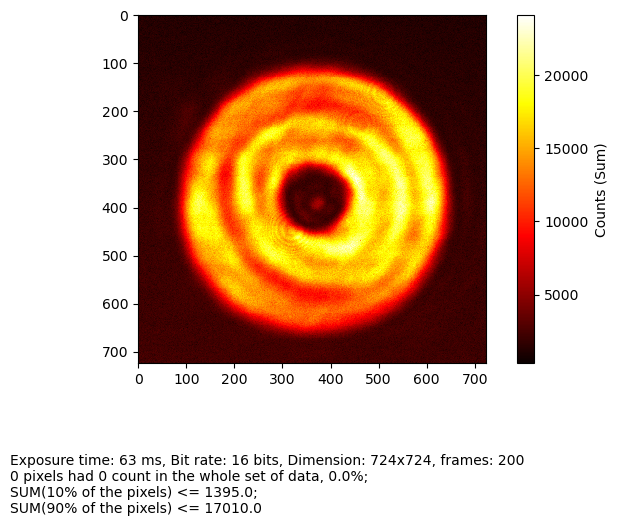

bins width: 241.25
8.2% of pixel Sum counts fall between 6 and 247.25 counts in all 200 frames


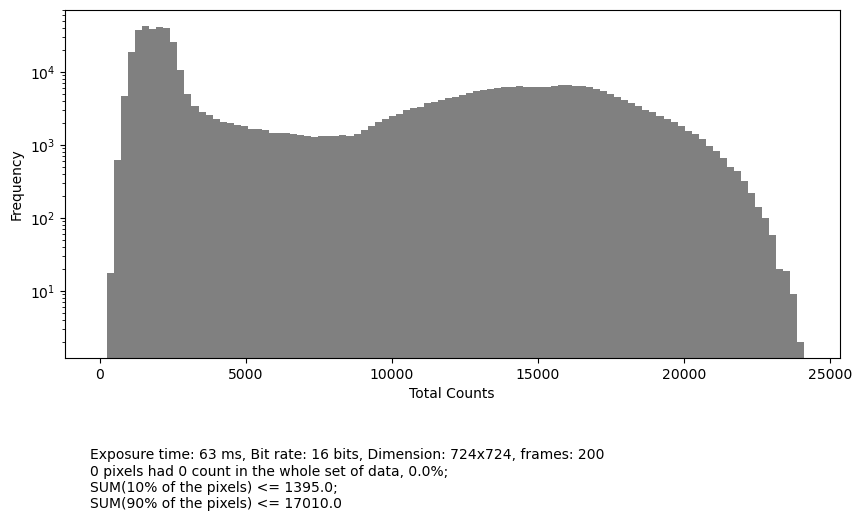

In [5]:
tiff_main_folder = 'C:\\LABDATA_office\\4.1'
tiff_path = tiff_main_folder + '\\data'

SUM_array = get_sum_array_dense(tiff_path, configs)

plot_configs:plotDict = dict(
                            array_type = 'SUM', 
                            bin_amount = 100, 
                            heatmap_max = None, 
                            dpi = 100, 
                            save = True
                            )


plot_SUM_or_RMS(SUM_array, tiff_path, configs, plot_configs, 'heat')
plot_SUM_or_RMS(SUM_array, tiff_path, configs, plot_configs, 'bar')